<a href="https://colab.research.google.com/github/mateus-neres/Machine_Learning_com_Python/blob/main/32_35_exploracao_e_analise_dos_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXPLORAÇÃO, ANÁLISE E TRATAMENTO DOS DADOS: PROJETO PREVISÃO DE DOENÇA CARDÍACA**

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para prever a tendência de uma pessoa desenvolver algum tipo de doença cardíaca com base em alguns fatores clínicos e laboratoriais de referência.

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/fedesoriano/heart-failure-prediction/version/1

In [1]:
import pandas as pd
import numpy as np

In [2]:
dados = pd.read_csv('/content/drive/MyDrive/curso_Udemy/Machine_Learning_com_Python/heart.csv',
                    sep = ',', encoding = 'iso-8859-1')
# encoding: Codificação de caracteres, geralmente utiliza-se iso-8859-1, utf-8 ou o latin-1

## **Explorando dados**

In [3]:
dados.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
dados.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [5]:
dados.shape

(918, 12)

# **Aula 33_exploracao_e_analise_dos_dados_parte_1**


## **Análise das variaveis(Atributos)**

### **Age = idade**

In [6]:
dados['Age'].value_counts()

54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64

In [11]:
dados.Age.value_counts().sort_index()

28     1
29     3
30     1
31     2
32     5
33     2
34     7
35    11
36     6
37    11
38    16
39    15
40    13
41    24
42    18
43    24
44    19
45    18
46    24
47    19
48    31
49    21
50    25
51    35
52    36
53    33
54    51
55    41
56    38
57    38
58    42
59    35
60    32
61    31
62    35
63    30
64    22
65    21
66    13
67    15
68    10
69    13
70     7
71     5
72     4
73     1
74     7
75     3
76     2
77     2
Name: Age, dtype: int64

In [8]:
import plotly.express as px

In [20]:
hist1 = px.histogram(dados, x = 'Age', nbins=90)
hist1.update_layout(width = 800, height = 500, title_text = 'Distribuição das idades')
hist1.show()

In [21]:
import seaborn as sns

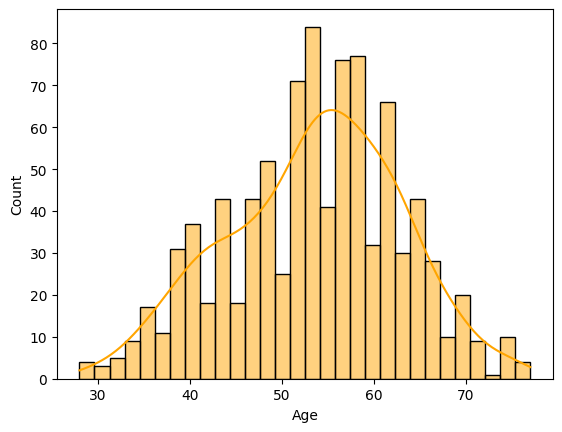

In [25]:
sns.histplot(dados, x = 'Age', bins = 30, color = 'orange', kde = True, stat = 'count');

### **Sex = Sexo**

In [28]:
dados.Sex.value_counts()

M    725
F    193
Name: Sex, dtype: int64

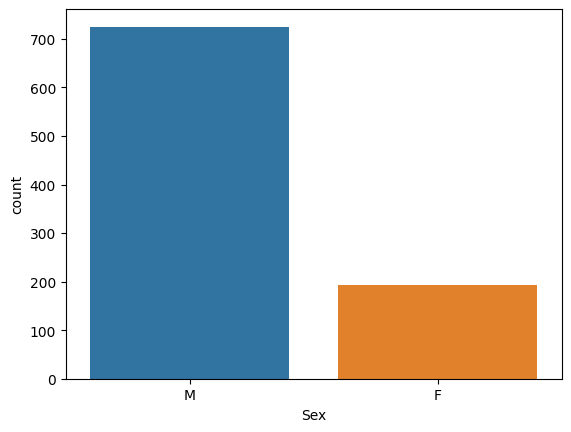

In [29]:
sns.countplot(x='Sex', data=dados);

In [31]:
dados.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


# **Aula 34_exploracao_e_analise_dos_dados_parte_2**

### **Chest Pain Type = Tipo de dor no peito**

In [30]:
dados.ChestPainType.value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

ASY: Assitomatico

NAP: Dor não anginosa

ATA: Angina atípica

TA: Angina típica

**Agina**: Dor no peito, causado pela diminuição do fluxo de sangue no coração

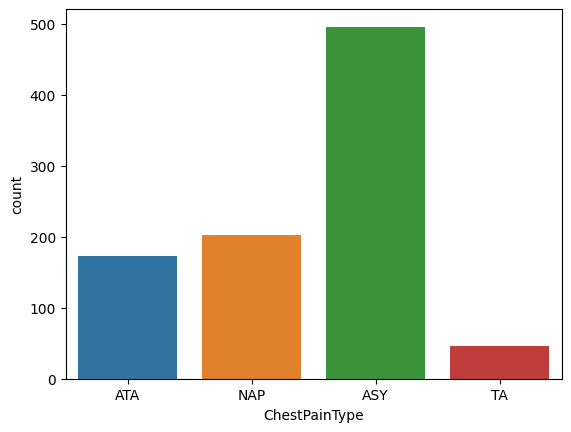

In [32]:
sns.countplot(x=dados.ChestPainType, data=dados);

## **Resting BP (blood pressure) = Pressão sanguínea em repouso em mmHg(sitólica)**

In [34]:
dados.RestingBP.value_counts().sort_index()

0       1
80      1
92      1
94      2
95      6
       ..
180    12
185     1
190     2
192     1
200     4
Name: RestingBP, Length: 67, dtype: int64

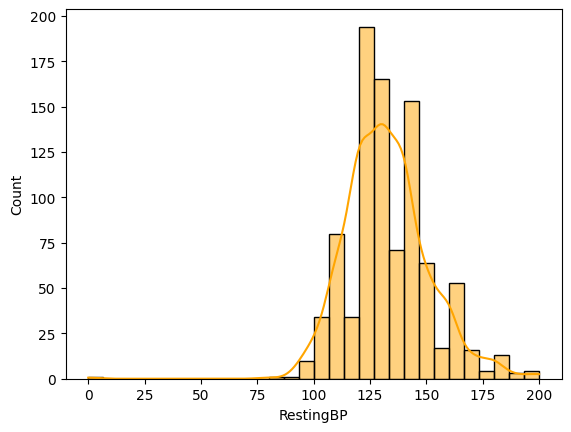

In [35]:
sns.histplot(dados, x = dados.RestingBP, bins=30, color = 'orange', kde = True, stat= 'count');

### **Cholesterol = Colesterol série (mg / dl)**

In [36]:
dados.Cholesterol.value_counts().sort_index()

0      172
85       1
100      2
110      1
113      1
      ... 
491      1
518      1
529      1
564      1
603      1
Name: Cholesterol, Length: 222, dtype: int64

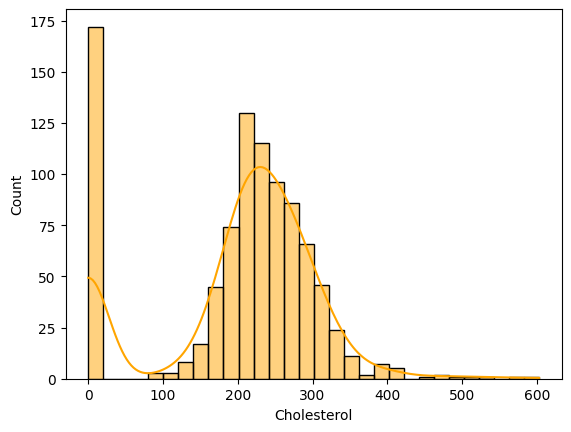

In [37]:
sns.histplot(dados, x = dados.Cholesterol, bins = 30, color = 'orange', kde = True, stat = 'count');

### **Fating BS (blood sugar) = açucar no sangue em jejum (mg/dl)**

In [38]:
dados.FastingBS.value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

0: Fasting BS <120mg/dl(não diabético)

1: Fasting BS >120mg/dl(Diabético)

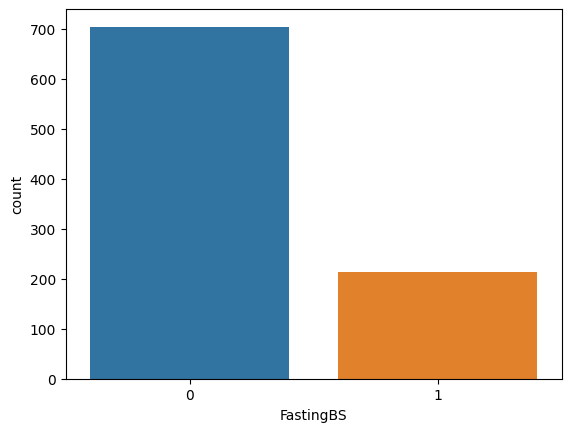

In [40]:
sns.countplot(x=dados.FastingBS, data=dados);

### **Resting ECG = eletrocrdiograma em repouso**

In [41]:
dados.RestingECG.value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

Normal: Normal

LVH: Hipertrofia ventricular esquerda

ST: Anormalidade da onda ST-T

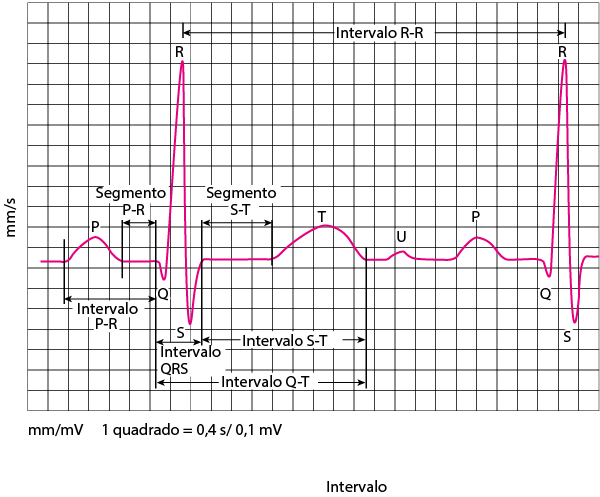

**SEGMENTO ST:** Qualquer desnível do
segmento ST, para cima (supradesnível) ou para baixo
(infradesnível), deve ser avaliado pois pode corresponder a um
infarto agudo do miocárdio.

### **Max HR (heart rate) = frequência cardíaca máxima**

### **Exercise Angina = Angina induzida por exercício**

### **Old Peak = Depressão de ST (referência no ECG) induzida por exercício em relação ao repouso**

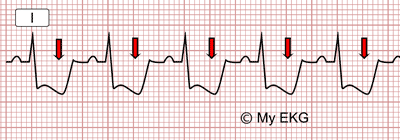

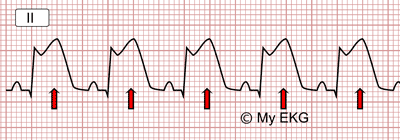

### **ST_Slope = Inclinação do segmento ST no ECG**

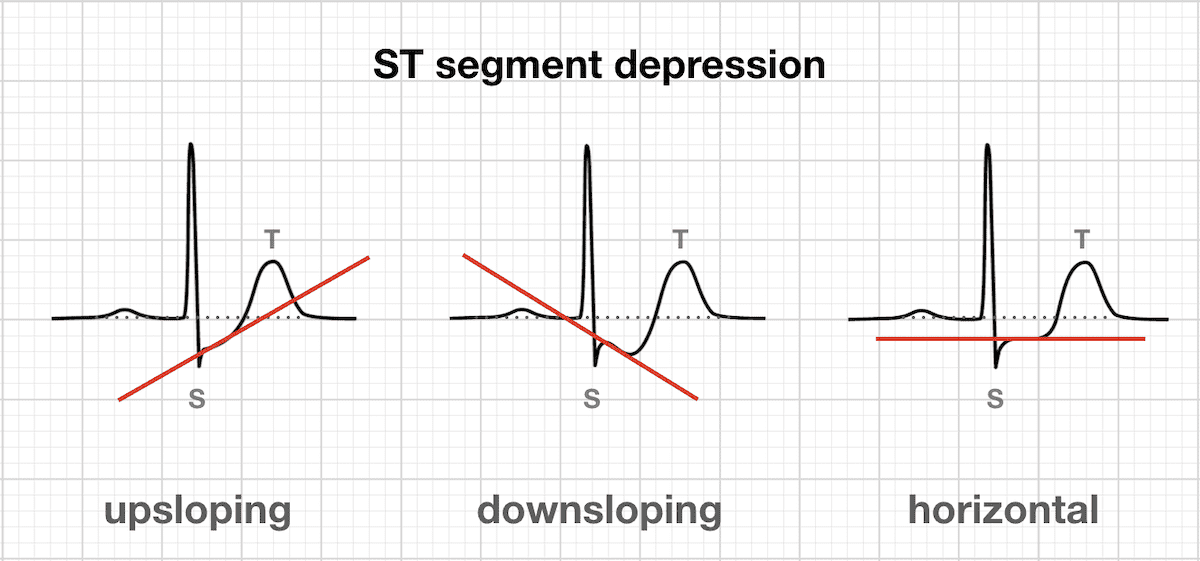

Flat = plano

Up = para cima

Down = para baixo

### **Heart Disease = Doença cardíaca**

0 = Não possui doença cardíaca

1 = Possui doença cardíaca

## **Análise dos tipos de atributos.**

## **Valores Missing (NAN)**

## **Análises Estatísticas Descritivas**

### **Tratando Valores Incoerentes**

**Excluindo registro com pressão zero**

**Substituindo valores zeros do Colesterol pela média sem os zeros**

### **Análise de Outliers**

# **Salvando (Exportando) o Dataframe Tratado**